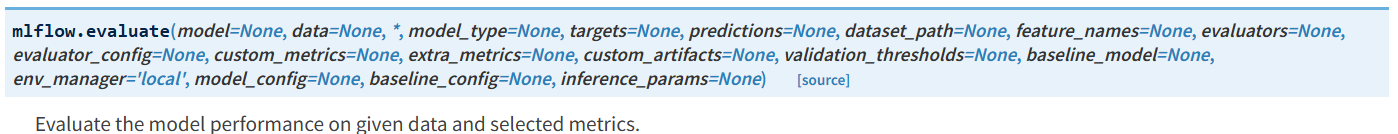

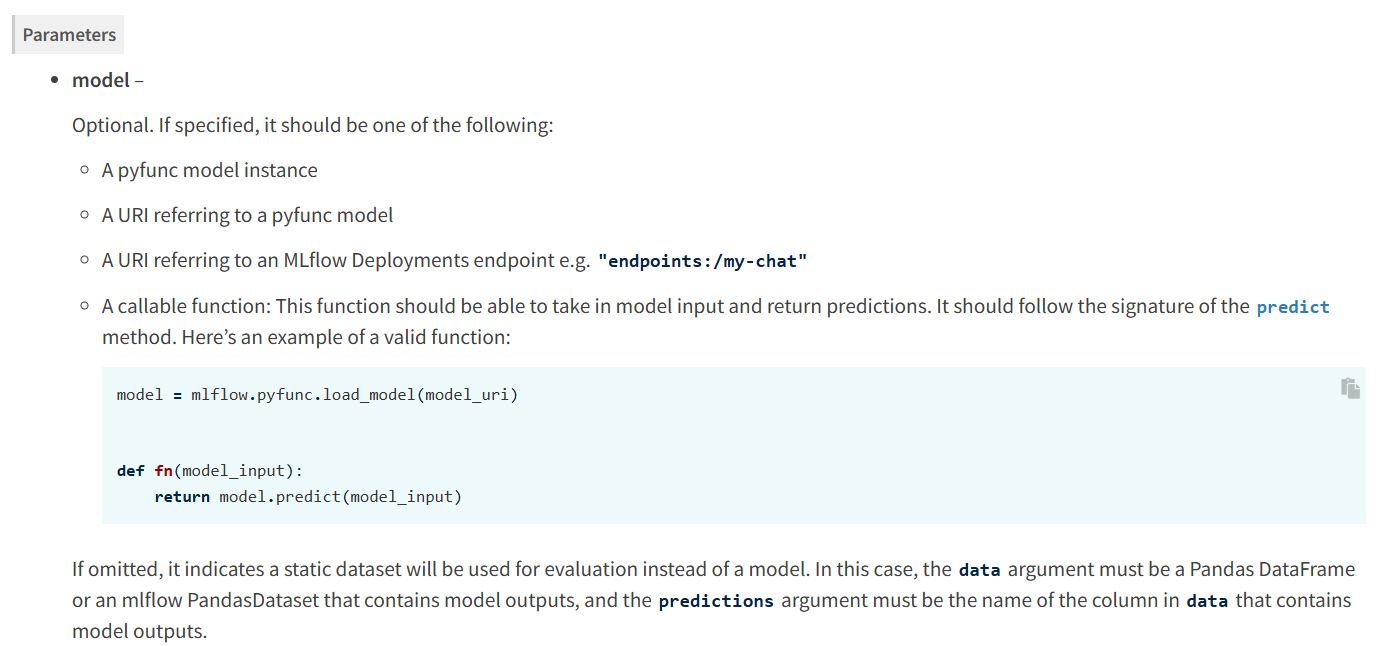

In [ ]:
import random
import mlflow 
import pandas as pd
from typing import Optional

from mlflow_for_ml_dev.src.utils.folder_operations import get_project_root


# set mlflow tracking uri
mlflow.set_tracking_uri(uri=(get_project_root() / 'mlruns').as_uri())

In [ ]:
# create the experiment
experiment_name = "evaluation"
try: 
    _ = mlflow.create_experiment(name=experiment_name)
except mlflow.exceptions.MlflowException:
    experiment = mlflow.get_experiment_by_name(name=experiment_name)
# set experiment
experiment = mlflow.set_experiment(experiment_name)

In [ ]:
def random_model(model_input:Optional[pd.DataFrame]=None) -> int:
    """
    This function returns a random integer between 0 and 1.
    :param model_input: A pandas DataFrame containing the model input data.
    """

    return [random.randint(0, 1) for _ in range(len(model_input))]
    

In [ ]:
eval_df = pd.DataFrame({
    "target": [random.randint(0, 1) for _ in range(100)],
})
eval_df.head()

In [ ]:
results = mlflow.evaluate(
    model=random_model,
    data=eval_df,
    targets="target",
    model_type="classifier",
)

In [ ]:
results.metrics